In [1]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split 

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [3]:
df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
304,0.041708,0.050680,-0.038540,0.052858,0.076860,0.116430,-0.039719,0.071210,-0.022517,-0.013504,253.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
313,0.059871,0.050680,0.053074,0.052858,0.032830,0.019667,-0.010266,0.034309,0.055203,-0.001078,163.0
119,0.016281,-0.044642,-0.047163,-0.002228,-0.019456,-0.042963,0.033914,-0.039493,0.027364,0.027917,200.0
154,0.067136,0.050680,0.020739,-0.005670,0.020446,0.026243,-0.002903,-0.002592,0.008641,0.003064,197.0


In [4]:
df.shape

(442, 11)

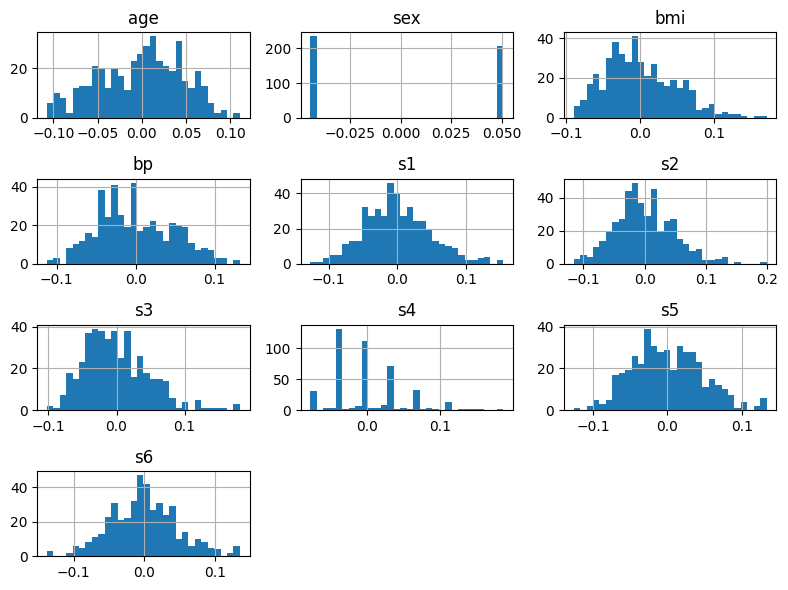

In [5]:
# Plot feature distributions (for a subset of features)
import matplotlib.pyplot as plt
df.drop('target', axis=1).hist(bins=30, figsize=(8, 6))
plt.tight_layout()
plt.show()

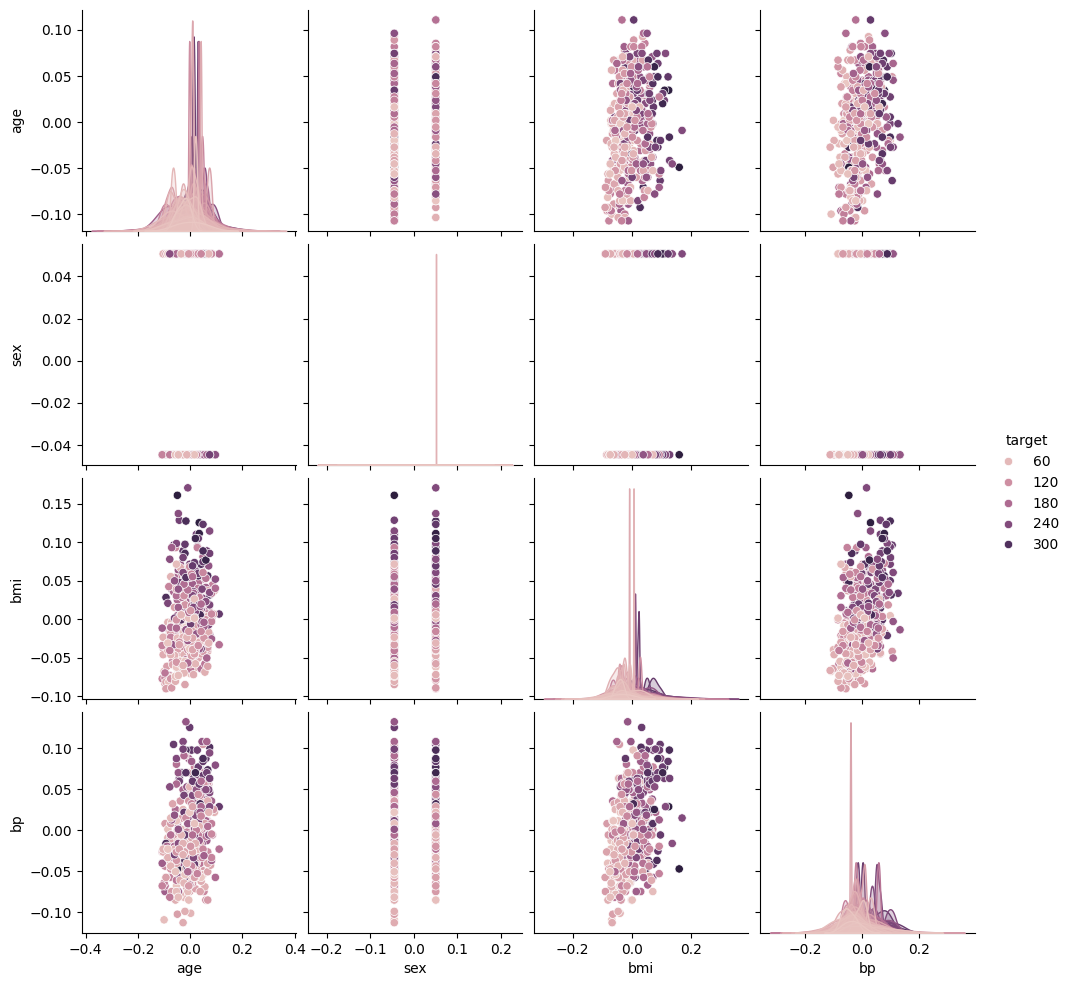

In [6]:
# Sample a few key features for pairplot
import seaborn as sns
sns.pairplot(df[['age', 'sex', 'bmi', 'bp', 'target']], hue='target')
plt.show()

In [7]:
x, y = df.drop(columns= 'target'), df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print((r2_score(y_test, y_pred_lr)))
print(cross_val_score(lr, x, y, cv=10).mean())

0.5527805419002397
0.4619602420450602


## Regression Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

print((r2_score(y_test, y_pred_dt)))
print(cross_val_score(dt, x, y, cv=10).mean())

-0.0916306339212245
-0.24594394933594188


## knn

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)


print((r2_score(y_test, y_pred_dt)))
print(cross_val_score(knn, x, y, cv=10).mean())

-0.0916306339212245
0.3303763174858294


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print(r2_score(y_test, y_pred_rf))
print(cross_val_score(rf, x, y, cv=10).mean())

0.5286078127821663
0.3830900104961249


# Voting Regressor

In [12]:
from sklearn.ensemble import VotingRegressor

estimators = [('linear_regression', lr), ('random_forest', rf)]
vc = VotingRegressor(estimators=estimators)
vc.fit(x_train, y_train)
y_pred_vc = rf.predict(x_test)

print(r2_score(y_test, y_pred_vc))
print(cross_val_score(vc, x, y, cv=10).mean())

0.5286078127821663
0.4498276769868837
